# Working with Economic data in Python

This notebook will introduce you to working with data in ``Python``. You will use packages like ``Numpy`` to manipulate, work and do computations with arrays, matrices, and such, and anipulate data (see my [Introduction to Python](./IntroPython.ipynb)). But given the needs of economists (and other scientists) it will be advantageous for us to use [pandas](http://pandas.pydata.org). [pandas](http://pandas.pydata.org) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for Python. [pandas](http://pandas.pydata.org) allows you to import and process data in many useful ways. It interacts greatly with [other packages](https://numfocus.org/sponsored-projects) that complement it making it a very powerful tool for data analysis. 

With [pandas](http://pandas.pydata.org) you can 
1. Import many types of data, including
    * CSV files
    * Tab or other types of delimited files 
    * Excel (xls, xlsx) files
    * Stata files

2. Open files directly from a website
3. Merge, select, join data
4. Perform statistical analyses
5. Create plots of your data
and much more. Let's start by importing ``pandas`` and use to it download some data and create some of the figures from the lecture notes. Note that when importing ``pandas`` it is accustomed to assign it the alias ``pd``. I suggest you follow this conventiuon, which will make using other peoples code and snippets easier.

In [1]:
# Let's import pandas and some other basic packages we will use 
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Working with Pandas

The basic structures in ``pandas`` are ``pd.Series`` and ``pd.DataFrame``. You can think of a ``pd.Series`` as a labeled vector that contains data and has a large set of functions that can be easily performed on it. A ``pd.DataFrame`` is similar a table/matrix of multidimensional data where each column contains a ``pd.Series``. I know...this may not explain much, so let's start with some actual examples. Let's create two series, one containing some country names and another containing some ficticious data.

In [2]:
countries = pd.Series(['Colombia', 'Turkey', 'USA', 'Germany', 'Chile'], name='country')
print(countries)
print('\n', 'There are ', countries.shape[0], 'countries in this series.')

0    Colombia
1      Turkey
2         USA
3     Germany
4       Chile
Name: country, dtype: object

 There are  5 countries in this series.


Notice that we have assinged a name to the series that is different than the name of the variable containing the series. Our ``print(countries)`` statement is showing the series and its contents, its name and the dype of data it contains. Here our series is only composed of strings so it assigns it the object dtype (not important for now, but we will use this later to convert data between types, e.g. strings to integers or floats or the other way around).

Let's create the data using some of the functions we already learned.

In [3]:
np.random.seed(123456)
data = pd.Series(np.random.normal(size=(countries.shape)), name='noise')
print(data)
print('\n', 'The average in this sample is ', data.mean())

0    0.469112
1   -0.282863
2   -1.509059
3   -1.135632
4    1.212112
Name: noise, dtype: float64

 The average in this sample is  -0.24926597871826645


Here we have used the ``mean()`` function of the series to compute its mean. There are many other properties/functions for these series including ``std()``, ``shape``, ``count()``, ``max()``, ``min()``, etc. You can access these by writing ``series.name_of_function_or_property``. To see what functions are available you can hit ``tab`` after writing ``series.``.

Let's create a ``pd.DataFrame`` using these two series.

In [4]:
df = pd.DataFrame([countries, data])
df

0         1        2        3        4
country  Colombia    Turkey      USA  Germany    Chile
noise    0.469112 -0.282863 -1.50906 -1.13563  1.21211

Not exactly what we'd like, but don't worry, we can just transpose it so it has each country with its data in a row.

In [5]:
df = df.T
df

country     noise
0  Colombia  0.469112
1    Turkey -0.282863
2       USA  -1.50906
3   Germany  -1.13563
4     Chile   1.21211

Now let us add some more data to this dataframe. This is done easily by defining a new columns. Let's create the square of ``noise``, create the sum of ``noise`` and its square, and get the length of the country's name. 

In [6]:
df['noise_sq'] = df.noise**2
df['noise and its square'] = df.noise + df.noise_sq
df['name length'] = df.country.apply(len)
df

country     noise   noise_sq noise and its square  name length
0  Colombia  0.469112   0.220066             0.689179            8
1    Turkey -0.282863  0.0800117            -0.202852            6
2       USA  -1.50906    2.27726             0.768199            3
3   Germany  -1.13563    1.28966             0.154029            7
4     Chile   1.21211    1.46922              2.68133            5

This shows some of the ways in which you can create new data. Especially useful is the ``apply`` mathod, which applies a function to the series. You can also apply a function to the whole dataframe, which is useful if you want to perfomr computations using various columns.

Now, let's plot the various series in the dataframe

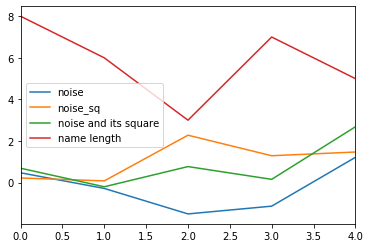

In [7]:
df.plot()

Not too nice nor useful. Notice that it assigned the row number to the x-axis labels. Let's change the row labels, which are contained in the dataframe's ``index`` by assigning the country names as the ``index``.

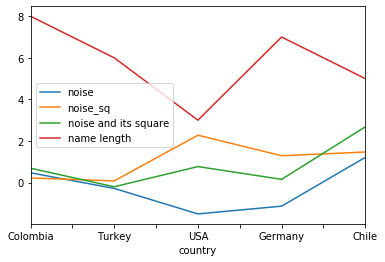

In [8]:
df = df.set_index('country')
df.plot()

Better, but still not very informative. Below we will improve on this when we work with some real data.

# Getting data

One of the nice features of pandas and its ecology is that it makes obtaining data very easy. In order to exemplify this and also to revisit some of the basic facts of comparative development, let's download some data from various sources. This may require you to create accounts in order to access and download the data (sometimes the process is very simple and does not require an actual project...in other cases you need to propose a project and be approved...usually due to privacy concerns with micro-data). Don't be afraid, all these sources are free and are used a lot in research, so it is good that you learn to use them. Let's start with a list of useful sources. 

## Country-level data economic data
* [World Bank](https://data.worldbank.org/) provides all kinds of socio-economic data.
* [Penn World Tables](https://www.rug.nl/ggdc/productivity/pwt/) is a database with information on relative levels of income, output, input and productivity, covering 182 countries between 1950 and 2017.
* [Maddison Historical Data](http://www.ggdc.net/maddison/oriindex.htm) provides the most used historical statistics on population and GDP
* [The Maddison Project Database](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2018) provides information on comparative economic growth and income levels over the very long run,  follow-up to Maddison. 
* [Comparative Historical National Accounts ](https://www.rug.nl/ggdc/historicaldevelopment/na/) provides information on Gross Domestic Product, including an industry breakdown, for the 19th and 20th centuries. 
* [Human Mortality Database](https://www.mortality.org/) provides detailed mortality and population data for the world for the last two centuries.

## Censuses, Surveys, and other micro-level data
* [IPUMS](https://ipums.org/): provides census and survey data from around the world integrated across time and space.
* [General Social Survey](http://gss.norc.org/get-the-data/) provides survey data on what Americans think and feel about such issues as national spending priorities, crime and punishment, intergroup relations, and confidence in institutions.
* [European Social Survey](https://www.europeansocialsurvey.org/data/) provides survey measures on the attitudes, beliefs and behaviour patterns of diverse European populations in more than thirty nations. 
* [UK Data Service](https://ukdataservice.ac.uk) is the  UK’s largest collection of social, economic and population data resources.
* [SHRUG](http://www.devdatalab.org/shrug) is The Socioeconomic High-resolution Rural-Urban Geographic Platform for India. Provides access to dozens of datasets covering India’s 500,000 villages and 8000 towns using a set of a common geographic identifiers that span 25 years.

# Divergence - Big time

To study the divergence across countries let's download and plot the historical GDP and population data. In order to keep the data and not having to download it everytime from scratch, we'll create a folder ``./data`` in the currect directory and save each file there. Also, we'll make sure that if the data does not exist, we download it. We'll use the ``os`` package to create directories.

### Setting up paths

In [9]:
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

### Download New Maddison Project Data

In [12]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False)

In [13]:
maddison_new

countrycode      country    year  cgdppc  rgdpnapc      pop         i_cig i_bm
0             AFG  Afghanistan  1820.0     NaN       NaN   3280.0           NaN  NaN
1             AFG  Afghanistan  1870.0     NaN       NaN   4207.0           NaN  NaN
2             AFG  Afghanistan  1913.0     NaN       NaN   5730.0           NaN  NaN
3             AFG  Afghanistan  1950.0  2392.0    2392.0   8150.0  Extrapolated  NaN
4             AFG  Afghanistan  1951.0  2422.0    2422.0   8284.0  Extrapolated  NaN
...           ...          ...     ...     ...       ...      ...           ...  ...
19868         ZWE     Zimbabwe  2012.0  1623.0    1604.0  12620.0  Extrapolated  NaN
19869         ZWE     Zimbabwe  2013.0  1801.0    1604.0  13183.0  Extrapolated  NaN
19870         ZWE     Zimbabwe  2014.0  1797.0    1594.0  13772.0  Extrapolated  NaN
19871         ZWE     Zimbabwe  2015.0  1759.0    1560.0  14230.0  Extrapolated  NaN
19872         ZWE     Zimbabwe  2016.0  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 8 columns]

This dataset is in long format. Also, notice that the year is not an integer. Let's correct this

In [14]:
maddison_new['year'] = maddison_new.year.astype(int)
maddison_new

countrycode      country  year  cgdppc  rgdpnapc      pop         i_cig i_bm
0             AFG  Afghanistan  1820     NaN       NaN   3280.0           NaN  NaN
1             AFG  Afghanistan  1870     NaN       NaN   4207.0           NaN  NaN
2             AFG  Afghanistan  1913     NaN       NaN   5730.0           NaN  NaN
3             AFG  Afghanistan  1950  2392.0    2392.0   8150.0  Extrapolated  NaN
4             AFG  Afghanistan  1951  2422.0    2422.0   8284.0  Extrapolated  NaN
...           ...          ...   ...     ...       ...      ...           ...  ...
19868         ZWE     Zimbabwe  2012  1623.0    1604.0  12620.0  Extrapolated  NaN
19869         ZWE     Zimbabwe  2013  1801.0    1604.0  13183.0  Extrapolated  NaN
19870         ZWE     Zimbabwe  2014  1797.0    1594.0  13772.0  Extrapolated  NaN
19871         ZWE     Zimbabwe  2015  1759.0    1560.0  14230.0  Extrapolated  NaN
19872         ZWE     Zimbabwe  2016  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 8 columns]

### Original Maddison Data
Now, let's download, save and read the original Maddison database. Since the original file is an excel file with different data on each sheet, it will require us to use a different method to get all the data.

In [15]:
if not os.path.exists(pathout + 'Maddison_original.xls'):
    import urllib
    dataurl = "http://www.ggdc.net/maddison/Historical_Statistics/horizontal-file_02-2010.xls"
    urllib.request.urlretrieve(dataurl, pathout + 'Maddison_original.xls')

#### Some data munging
This dataset is not very nicely structured for importing, as you can see if you open it in Excel. I suggest you do so, so that you can better see what is going on. Notice that the first two rows really have no data. Also, every second column is empty. Moreover, there are a few empty rows. Let's import the data and clean it so we can plot and analyse it better.

In [16]:
maddison_old_pop = pd.read_excel(pathout + 'Maddison_original.xls', sheet_name="Population", skiprows=2)
maddison_old_pop

Unnamed: 0      1  Unnamed: 2   1000  Unnamed: 4    1500  Unnamed: 6    1600  Unnamed: 8    1700  ...       2002       2003       2004       2005       2006       2007  \
0    Western Europe     NaN         NaN    NaN         NaN     NaN         NaN     NaN         NaN     NaN  ...        NaN        NaN        NaN        NaN        NaN        NaN   
1           Austria   500.0         NaN  700.0         NaN  2000.0         NaN  2500.0         NaN  2500.0  ...   8148.312   8162.656   8174.762   8184.691   8192.880   8199.783   
2           Belgium   300.0         NaN  400.0         NaN  1400.0         NaN  1600.0         NaN  2000.0  ...  10311.970  10330.824  10348.276  10364.388  10379.067  10392.226   
3           Denmark   180.0         NaN  360.0         NaN   600.0         NaN   650.0         NaN   700.0  ...   5374.693   5394.138   5413.392   5432.335   5450.661   5468.120   
4           Finland    20.0         NaN   40.0         NaN   300.0         NaN   400.0         NaN   400.0  ...   5193.039   5204.405   5214.512   5223.442   5231.372   5238.460   
..               ...    ...         ...    ...         ...     ...         ...     ...         ...     ...  ...        ...        ...        ...        ...        ...        ...   
273       Guadeloupe    NaN         NaN    NaN         NaN     NaN         NaN     NaN         NaN     NaN  ...    435.739    440.189    444.515    448.713    452.776    456.698   
274     Guyana (Fr.)    NaN         NaN    NaN         NaN     NaN         NaN     NaN         NaN     NaN  ...    182.333    186.917    191.309    195.506    199.509    203.321   
275       Martinique    NaN         NaN    NaN         NaN     NaN         NaN     NaN         NaN     NaN  ...    422.277    425.966    429.510    432.900    436.131    439.202   
276         Reunion     NaN         NaN    NaN         NaN     NaN         NaN     NaN         NaN     NaN  ...    743.981    755.171    766.153    776.948    787.584    798.094   
277            Total    NaN         NaN    NaN         NaN     NaN         NaN     NaN         NaN     NaN  ...   1784.330   1808.243   1831.487   1854.067   1876.000   1897.315   

          2008   2009  Unnamed: 201       2030  
0          NaN    NaN           NaN        NaN  
1     8205.533   8210           NaN   8120.000  
2    10403.951  10414           NaN  10409.000  
3     5484.723   5501           NaN   5730.488  
4     5244.749   5250           NaN   5201.445  
..         ...    ...           ...        ...  
273    460.486   n.a.           NaN    523.493  
274    206.941   n.a.           NaN    272.781  
275    442.119   n.a.           NaN    486.714  
276    808.506   n.a.           NaN   1025.217  
277   1918.052   n.a.           NaN   2308.205  

[278 rows x 203 columns]

In [17]:
maddison_old_gdppc = pd.read_excel(pathout + 'Maddison_original.xls', sheet_name="PerCapita GDP", skiprows=2)
maddison_old_gdppc

Unnamed: 0           1  Unnamed: 2        1000  Unnamed: 4     1500  Unnamed: 6        1600  Unnamed: 8         1700  ...          1999          2000          2001  \
0    Western Europe          NaN         NaN         NaN         NaN                  NaN         NaN         NaN          NaN  ...           NaN           NaN           NaN   
1           Austria   425.000000         NaN  425.000000         NaN      707         NaN  837.200000         NaN   993.200000  ...  20065.093878  20691.415561  20812.893753   
2           Belgium   450.000000         NaN  425.000000         NaN      875         NaN  975.625000         NaN  1144.000000  ...  19964.428266  20656.458570  20761.238278   
3           Denmark   400.000000         NaN  400.000000         NaN  738.333         NaN  875.384615         NaN  1038.571429  ...  22254.890572  22975.162513  23059.374968   
4           Finland   400.000000         NaN  400.000000         NaN  453.333         NaN  537.500000         NaN   637.500000  ...  18855.985066  19770.363126  20245.896529   
..               ...         ...         ...         ...         ...      ...         ...         ...         ...          ...  ...           ...           ...           ...   
190    Total Africa   472.352941         NaN  424.767802         NaN   413.71         NaN  422.071584         NaN   420.628684  ...   1430.752576   1447.071701   1471.156532   
191              NaN         NaN         NaN         NaN         NaN      NaN         NaN         NaN         NaN          NaN  ...           NaN           NaN           NaN   
192              NaN         NaN         NaN         NaN         NaN      NaN         NaN         NaN         NaN          NaN  ...           NaN           NaN           NaN   
193              NaN         NaN         NaN         NaN         NaN      NaN         NaN         NaN         NaN          NaN  ...           NaN           NaN           NaN   
194    World Average  466.752281         NaN  453.402162         NaN  566.389         NaN  595.783856         NaN   614.853602  ...   5833.255492   6037.675887   6131.705471   

             2002          2003          2004          2005          2006          2007          2008  
0             NaN           NaN           NaN           NaN           NaN           NaN           NaN  
1    20955.874051  21165.047259  21626.929322  22140.725899  22892.682427  23674.041130  24130.547035  
2    21032.935511  21205.859281  21801.602508  22246.561977  22881.632810  23446.949672  23654.763464  
3    23082.620719  23088.582457  23492.664119  23972.564284  24680.492880  24995.245167  24620.568805  
4    20521.702225  20845.802738  21574.406196  22140.573208  23190.283543  24131.519569  24343.586318  
..            ...           ...           ...           ...           ...           ...           ...  
190   1482.629352   1517.935644   1558.099461   1603.686517   1663.531318   1724.226776   1780.265474  
191           NaN           NaN           NaN           NaN           NaN           NaN           NaN  
192           NaN           NaN           NaN           NaN           NaN           NaN           NaN  
193           NaN           NaN           NaN           NaN           NaN           NaN           NaN  
194   6261.734267   6469.119575   6738.281333   6960.031035   7238.383483   7467.648232   7613.922924  

[195 rows x 200 columns]

Let's start by renaming the first column, which has the region/country names

In [18]:
maddison_old_pop.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
maddison_old_gdppc.rename(columns={'Unnamed: 0':'Country'}, inplace=True)

Now let's drop all the columns that do not have data

In [19]:
maddison_old_pop = maddison_old_pop[[col for col in maddison_old_pop.columns if str(col).startswith('Unnamed')==False]]
maddison_old_gdppc = maddison_old_gdppc[[col for col in maddison_old_gdppc.columns if str(col).startswith('Unnamed')==False]]

Now, let's change the name of the columns so they reflect the underlying variable

In [20]:
maddison_old_pop.columns = ['Country'] + ['pop_'+str(col) for col in maddison_old_pop.columns[1:]]
maddison_old_gdppc.columns = ['Country'] + ['gdppc_'+str(col) for col in maddison_old_gdppc.columns[1:]]

In [21]:
maddison_old_pop

Country  pop_1  pop_1000  pop_1500  pop_1600  pop_1700  pop_1820  pop_1821  pop_1822  pop_1823  ...   pop_2001   pop_2002   pop_2003   pop_2004   pop_2005  \
0    Western Europe     NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  ...        NaN        NaN        NaN        NaN        NaN   
1           Austria   500.0     700.0    2000.0    2500.0    2500.0    3369.0    3386.0    3402.0    3419.0  ...   8131.690   8148.312   8162.656   8174.762   8184.691   
2           Belgium   300.0     400.0    1400.0    1600.0    2000.0    3434.0    3464.0    3495.0    3526.0  ...  10291.679  10311.970  10330.824  10348.276  10364.388   
3           Denmark   180.0     360.0     600.0     650.0     700.0    1155.0    1167.0    1179.0    1196.0  ...   5355.826   5374.693   5394.138   5413.392   5432.335   
4           Finland    20.0      40.0     300.0     400.0     400.0    1169.0    1186.0    1202.0    1219.0  ...   5180.309   5193.039   5204.405   5214.512   5223.442   
..               ...    ...       ...       ...       ...       ...       ...       ...       ...       ...  ...        ...        ...        ...        ...        ...   
273       Guadeloupe    NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  ...    431.170    435.739    440.189    444.515    448.713   
274     Guyana (Fr.)    NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  ...    177.562    182.333    186.917    191.309    195.506   
275       Martinique    NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  ...    418.454    422.277    425.966    429.510    432.900   
276         Reunion     NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  ...    732.570    743.981    755.171    766.153    776.948   
277            Total    NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  ...   1759.756   1784.330   1808.243   1831.487   1854.067   

      pop_2006   pop_2007   pop_2008  pop_2009   pop_2030  
0          NaN        NaN        NaN       NaN        NaN  
1     8192.880   8199.783   8205.533      8210   8120.000  
2    10379.067  10392.226  10403.951     10414  10409.000  
3     5450.661   5468.120   5484.723      5501   5730.488  
4     5231.372   5238.460   5244.749      5250   5201.445  
..         ...        ...        ...       ...        ...  
273    452.776    456.698    460.486      n.a.    523.493  
274    199.509    203.321    206.941      n.a.    272.781  
275    436.131    439.202    442.119      n.a.    486.714  
276    787.584    798.094    808.506      n.a.   1025.217  
277   1876.000   1897.315   1918.052      n.a.   2308.205  

[278 rows x 197 columns]

In [22]:
maddison_old_gdppc

Country     gdppc_1  gdppc_1000 gdppc_1500  gdppc_1600   gdppc_1700   gdppc_1820   gdppc_1821   gdppc_1822   gdppc_1823  ...    gdppc_1999    gdppc_2000  \
0    Western Europe          NaN         NaN                    NaN          NaN          NaN          NaN          NaN          NaN  ...           NaN           NaN   
1           Austria   425.000000  425.000000        707  837.200000   993.200000  1218.165628          NaN          NaN          NaN  ...  20065.093878  20691.415561   
2           Belgium   450.000000  425.000000        875  975.625000  1144.000000  1318.870122          NaN          NaN          NaN  ...  19964.428266  20656.458570   
3           Denmark   400.000000  400.000000    738.333  875.384615  1038.571429  1273.593074  1320.479863  1326.547922  1307.692308  ...  22254.890572  22975.162513   
4           Finland   400.000000  400.000000    453.333  537.500000   637.500000   781.009410          NaN          NaN          NaN  ...  18855.985066  19770.363126   
..               ...         ...         ...        ...         ...          ...          ...          ...          ...          ...  ...           ...           ...   
190    Total Africa   472.352941  424.767802     413.71  422.071584   420.628684   419.755914          NaN          NaN          NaN  ...   1430.752576   1447.071701   
191              NaN         NaN         NaN        NaN         NaN          NaN          NaN          NaN          NaN          NaN  ...           NaN           NaN   
192              NaN         NaN         NaN        NaN         NaN          NaN          NaN          NaN          NaN          NaN  ...           NaN           NaN   
193              NaN         NaN         NaN        NaN         NaN          NaN          NaN          NaN          NaN          NaN  ...           NaN           NaN   
194    World Average  466.752281  453.402162    566.389  595.783856   614.853602   665.735330          NaN          NaN          NaN  ...   5833.255492   6037.675887   

       gdppc_2001    gdppc_2002    gdppc_2003    gdppc_2004    gdppc_2005    gdppc_2006    gdppc_2007    gdppc_2008  
0             NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  
1    20812.893753  20955.874051  21165.047259  21626.929322  22140.725899  22892.682427  23674.041130  24130.547035  
2    20761.238278  21032.935511  21205.859281  21801.602508  22246.561977  22881.632810  23446.949672  23654.763464  
3    23059.374968  23082.620719  23088.582457  23492.664119  23972.564284  24680.492880  24995.245167  24620.568805  
4    20245.896529  20521.702225  20845.802738  21574.406196  22140.573208  23190.283543  24131.519569  24343.586318  
..            ...           ...           ...           ...           ...           ...           ...           ...  
190   1471.156532   1482.629352   1517.935644   1558.099461   1603.686517   1663.531318   1724.226776   1780.265474  
191           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  
192           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  
193           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  
194   6131.705471   6261.734267   6469.119575   6738.281333   6960.031035   7238.383483   7467.648232   7613.922924  

[195 rows x 195 columns]

Let's choose the rows that hold the aggregates by region for the main regions of the world.

In [23]:
gdppc = maddison_old_gdppc.loc[maddison_old_gdppc.Country.apply(lambda x: str(x).upper().find('TOTAL')!=-1)].reset_index(drop=True)
gdppc = gdppc.dropna(subset=['gdppc_1'])
gdppc = gdppc.loc[2:]
gdppc['Country'] = gdppc.Country.str.replace('Total', '').str.replace('Countries', '').str.replace('\d+', '').str.replace('European', 'Europe').str.strip()
gdppc = gdppc.loc[gdppc.Country.apply(lambda x: x.find('USSR')==-1 and  x.find('West Asian')==-1)].reset_index(drop=True)
gdppc

Country     gdppc_1  gdppc_1000 gdppc_1500  gdppc_1600  gdppc_1700   gdppc_1820  gdppc_1821  gdppc_1822  gdppc_1823  ...    gdppc_1999    gdppc_2000    gdppc_2001  \
0     Western Europe  576.167665  427.425665    771.094  887.906964  993.456911  1194.184683         NaN         NaN         NaN  ...  18497.208533  19176.001655  19463.863297   
1  Western Offshoots  400.000000  400.000000        400  400.000000  476.000000  1201.993477         NaN         NaN         NaN  ...  26680.580823  27393.808035  27387.312035   
2        East Europe  411.789474  400.000000        496  548.023599  606.010638   683.160984         NaN         NaN         NaN  ...   5734.162109   5970.165085   6143.112873   
3      Latin America  400.000000  400.000000    416.457  437.558140  526.639004   691.060678         NaN         NaN         NaN  ...   5765.585093   5889.237351   5846.295193   
4               Asia  455.671021  469.961665    568.418  573.550859  571.605276   580.626115         NaN         NaN         NaN  ...   3623.902724   3797.608955   3927.186275   
5             Africa  472.352941  424.767802     413.71  422.071584  420.628684   419.755914         NaN         NaN         NaN  ...   1430.752576   1447.071701   1471.156532   

     gdppc_2002    gdppc_2003    gdppc_2004    gdppc_2005    gdppc_2006    gdppc_2007    gdppc_2008  
0  19627.707522  19801.145425  20199.220700  20522.238008  21087.304789  21589.011346  21671.774225  
1  27648.644070  28090.274362  28807.845958  29415.399334  29922.741918  30344.425293  30151.805880  
2   6321.395376   6573.365882   6942.136596   7261.721015   7730.097570   8192.881904   8568.967581  
3   5746.609672   5785.841237   6063.068969   6265.525702   6530.533583   6783.869986   6973.134656  
4   4121.275511   4388.982705   4661.517477   4900.563281   5187.253152   5408.383588   5611.198564  
5   1482.629352   1517.935644   1558.099461   1603.686517   1663.531318   1724.226776   1780.265474  

[6 rows x 195 columns]

Let's drop missing values

In [24]:
gdppc = gdppc.dropna(axis=1, how='any')
gdppc

Country     gdppc_1  gdppc_1000 gdppc_1500  gdppc_1600  gdppc_1700   gdppc_1820   gdppc_1870   gdppc_1900   gdppc_1913  ...    gdppc_1999    gdppc_2000  \
0     Western Europe  576.167665  427.425665    771.094  887.906964  993.456911  1194.184683  1953.068150  2884.661525  3456.576178  ...  18497.208533  19176.001655   
1  Western Offshoots  400.000000  400.000000        400  400.000000  476.000000  1201.993477  2419.152411  4014.870040  5232.816582  ...  26680.580823  27393.808035   
2        East Europe  411.789474  400.000000        496  548.023599  606.010638   683.160984   936.628265  1437.944586  1694.879668  ...   5734.162109   5970.165085   
3      Latin America  400.000000  400.000000    416.457  437.558140  526.639004   691.060678   676.005331  1113.071149  1494.431922  ...   5765.585093   5889.237351   
4               Asia  455.671021  469.961665    568.418  573.550859  571.605276   580.626115   553.459947   637.615593   695.131881  ...   3623.902724   3797.608955   
5             Africa  472.352941  424.767802     413.71  422.071584  420.628684   419.755914   500.011054   601.236364   637.433138  ...   1430.752576   1447.071701   

     gdppc_2001    gdppc_2002    gdppc_2003    gdppc_2004    gdppc_2005    gdppc_2006    gdppc_2007    gdppc_2008  
0  19463.863297  19627.707522  19801.145425  20199.220700  20522.238008  21087.304789  21589.011346  21671.774225  
1  27387.312035  27648.644070  28090.274362  28807.845958  29415.399334  29922.741918  30344.425293  30151.805880  
2   6143.112873   6321.395376   6573.365882   6942.136596   7261.721015   7730.097570   8192.881904   8568.967581  
3   5846.295193   5746.609672   5785.841237   6063.068969   6265.525702   6530.533583   6783.869986   6973.134656  
4   3927.186275   4121.275511   4388.982705   4661.517477   4900.563281   5187.253152   5408.383588   5611.198564  
5   1471.156532   1482.629352   1517.935644   1558.099461   1603.686517   1663.531318   1724.226776   1780.265474  

[6 rows x 70 columns]

Let's convert from wide to long format

In [25]:
gdppc = pd.wide_to_long(gdppc, ['gdppc_'], i='Country', j='year').reset_index()
gdppc

Country  year   gdppc_
0       Western Europe     1  576.168
1    Western Offshoots     1      400
2          East Europe     1  411.789
3        Latin America     1      400
4                 Asia     1  455.671
..                 ...   ...      ...
409  Western Offshoots  2008  30151.8
410        East Europe  2008  8568.97
411      Latin America  2008  6973.13
412               Asia  2008   5611.2
413             Africa  2008  1780.27

[414 rows x 3 columns]

# Plotting

We can now plot the data. Let's try two different ways. The first uses the ``plot`` function from ``pandas``. The second uses the package ``seaborn``, which improves on the capabilities of ``matplotlib``. The main difference is how the data needs to be organized. Of course, these are not the only ways to plot and we can try others.

In [26]:
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

Let's pivot the table so that each region is a column and each row is a year. This will allow us to plot using the ``plot`` function of the ``pandas DataFrame``.

In [27]:
gdppc2 = gdppc.pivot_table(index='year',columns='Country',values='gdppc_',aggfunc='sum')
gdppc2

Country       Africa         Asia  East Europe  Latin America  Western Europe  Western Offshoots
year                                                                                            
1         472.352941   455.671021   411.789474     400.000000      576.167665         400.000000
1000      424.767802   469.961665   400.000000     400.000000      427.425665         400.000000
1500      413.709504   568.417900   496.000000     416.457143      771.093805         400.000000
1600      422.071584   573.550859   548.023599     437.558140      887.906964         400.000000
1700      420.628684   571.605276   606.010638     526.639004      993.456911         476.000000
...              ...          ...          ...            ...             ...                ...
2004     1558.099461  4661.517477  6942.136596    6063.068969    20199.220700       28807.845958
2005     1603.686517  4900.563281  7261.721015    6265.525702    20522.238008       29415.399334
2006     1663.531318  5187.253152  7730.097570    6530.533583    21087.304789       29922.741918
2007     1724.226776  5408.383588  8192.881904    6783.869986    21589.011346       30344.425293
2008     1780.265474  5611.198564  8568.967581    6973.134656    21671.774225       30151.805880

[69 rows x 6 columns]

Ok. Let's plot using the ``pandas`` ``plot`` function. 

Text(0, 0.5, "GDP per capita (1990 Int'l US$)")

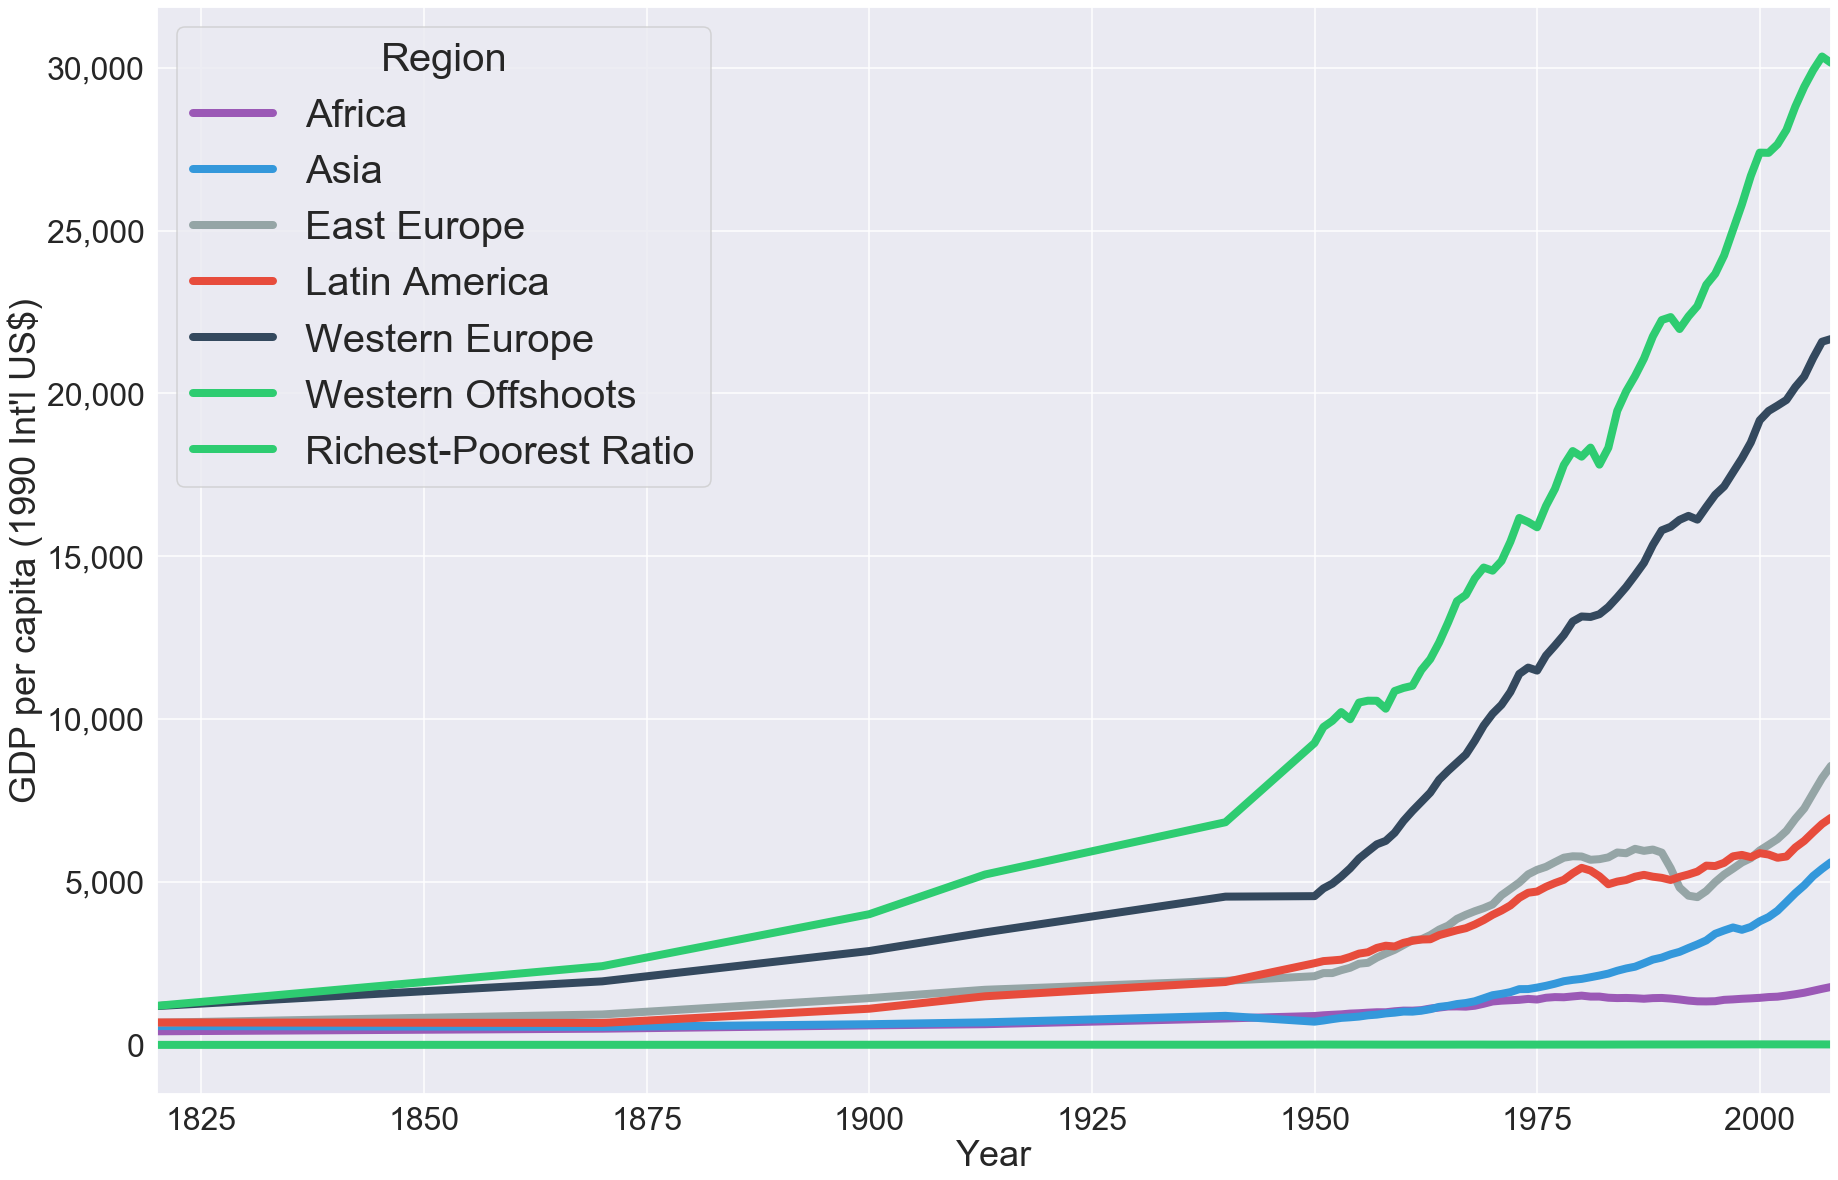

In [69]:
# Select some colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
gdppc2.loc[1800:].plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Region", prop = {'size':40})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('GDP per capita (1990 Int\'l US$)', fontsize=36)


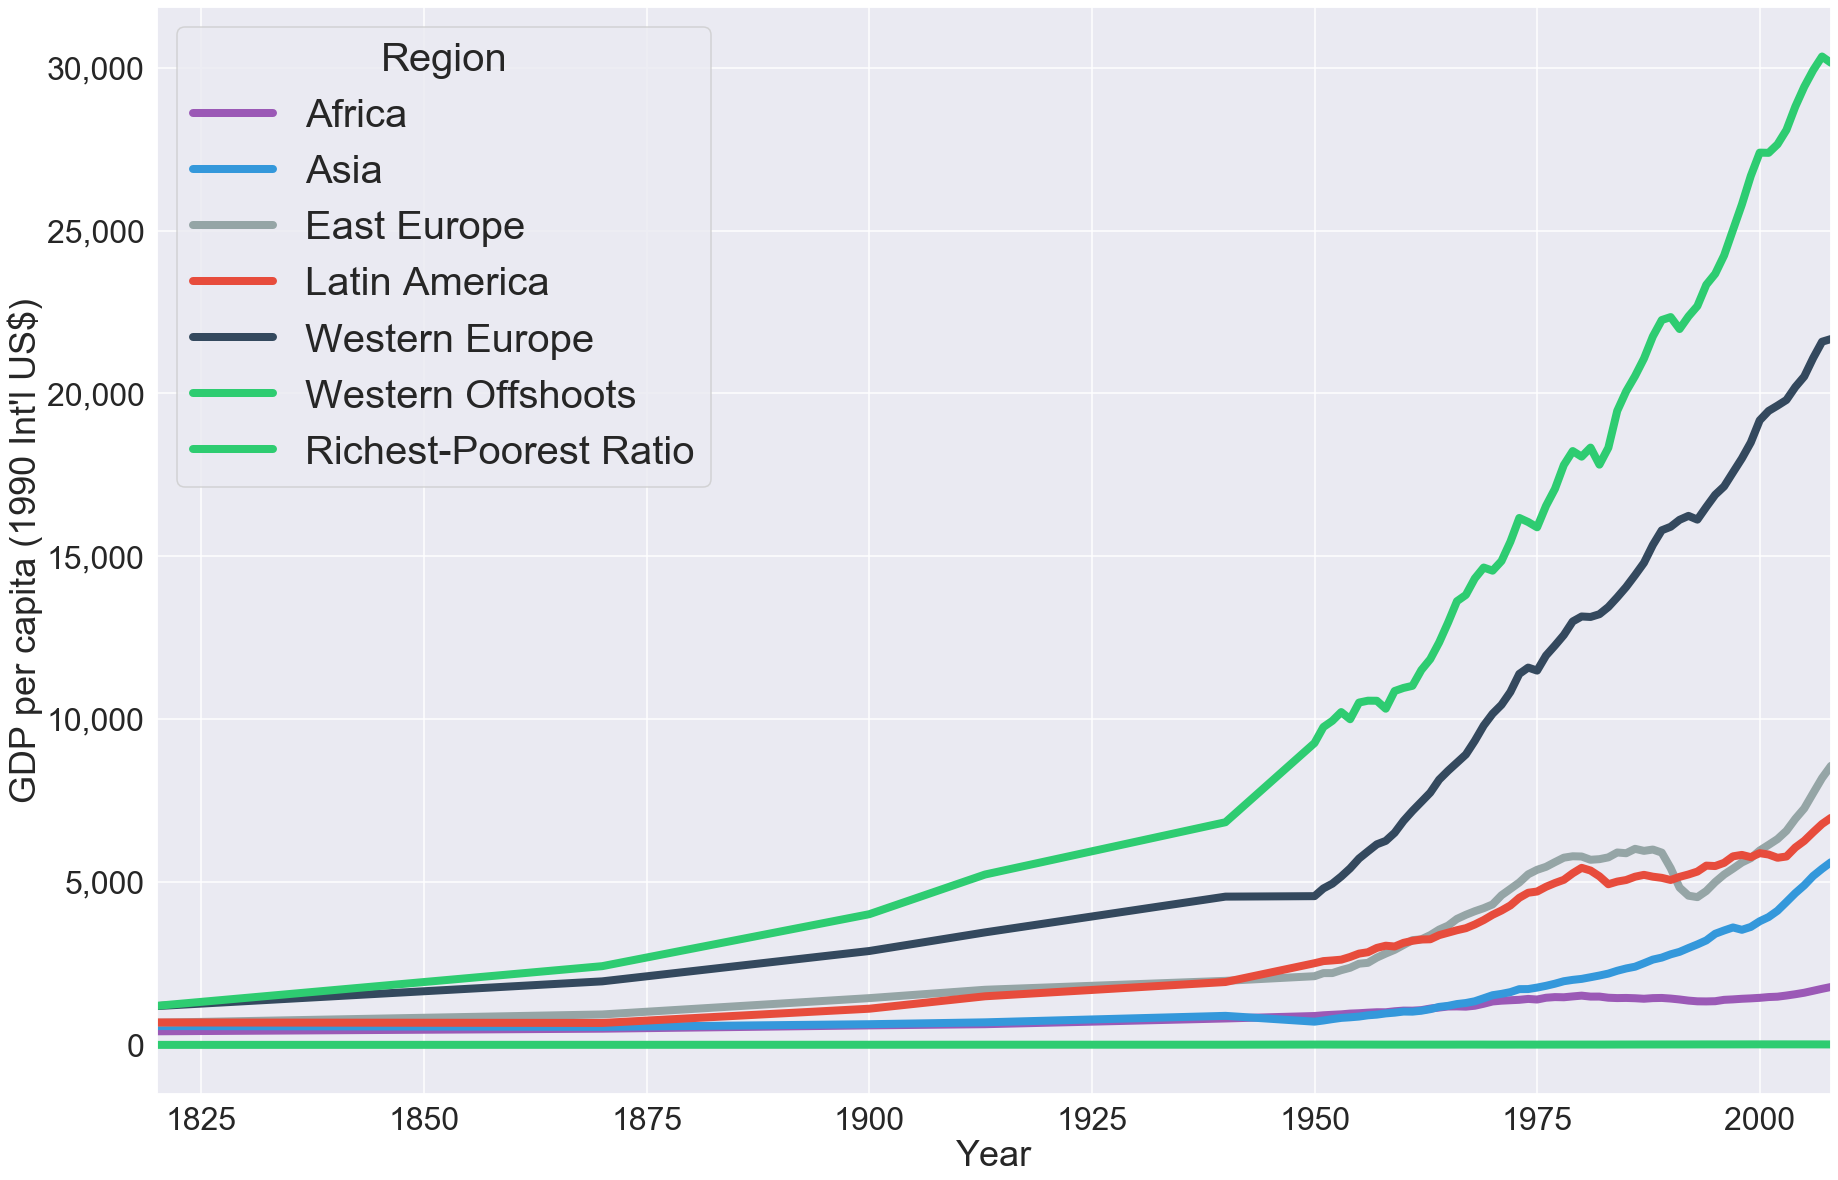

In [71]:
fig

Now, let's use ``seaborn``

Text(0, 0.5, "GDP per capita (1990 Int'l US$)")

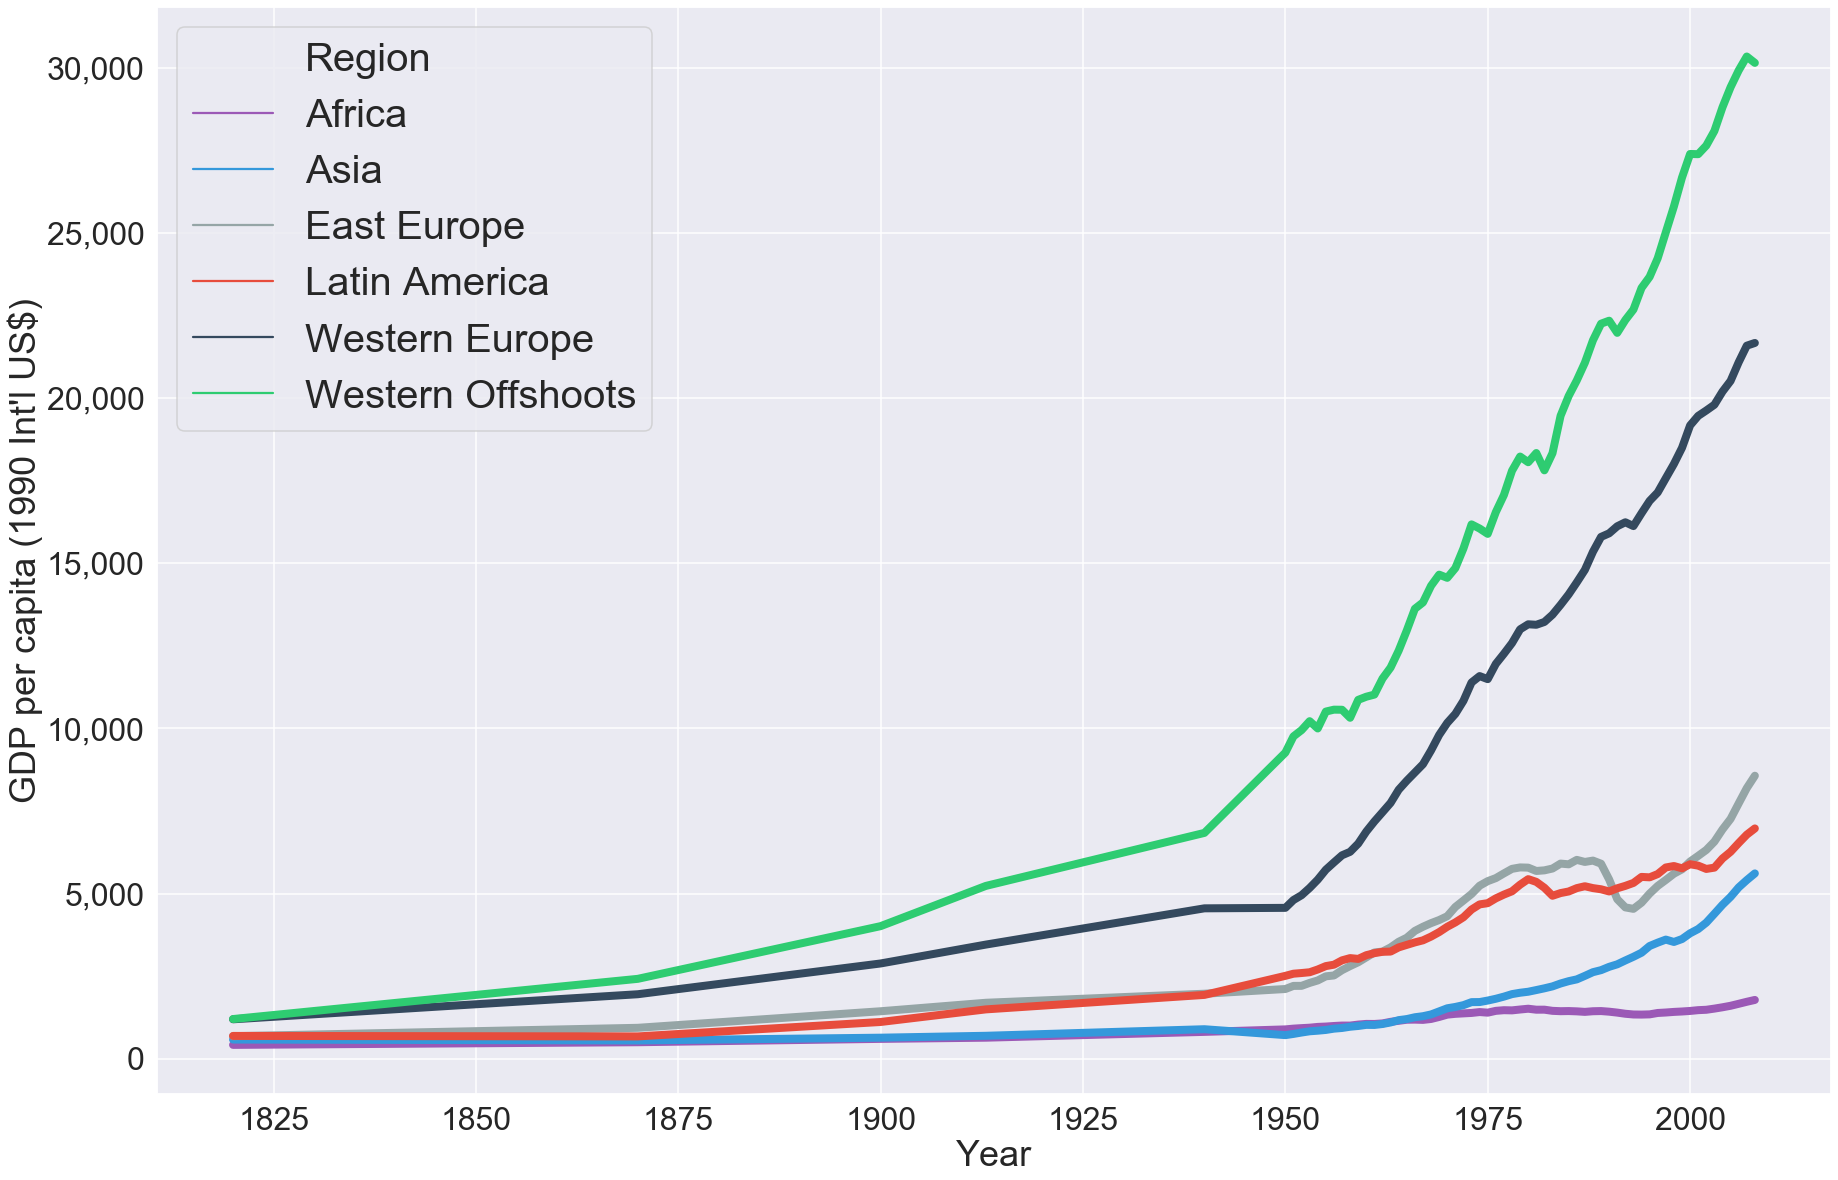

In [72]:
gdppc['Region'] = gdppc.Country.astype('category')
gdppc['gdppc_'] = gdppc.gdppc_.astype(float)
# Plot
fig, ax = plt.subplots(figsize=(30,20))
sns.lineplot(x='year', y='gdppc_', hue='Region', data=gdppc.loc[gdppc.year>=1800].reset_index(drop=True), alpha=1, lw=8, palette=sns.color_palette(mycolors), style='Region', dashes=False, markers=False)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(title='', prop={'size': 40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('GDP per capita (1990 Int\'l US$)', fontsize=36)


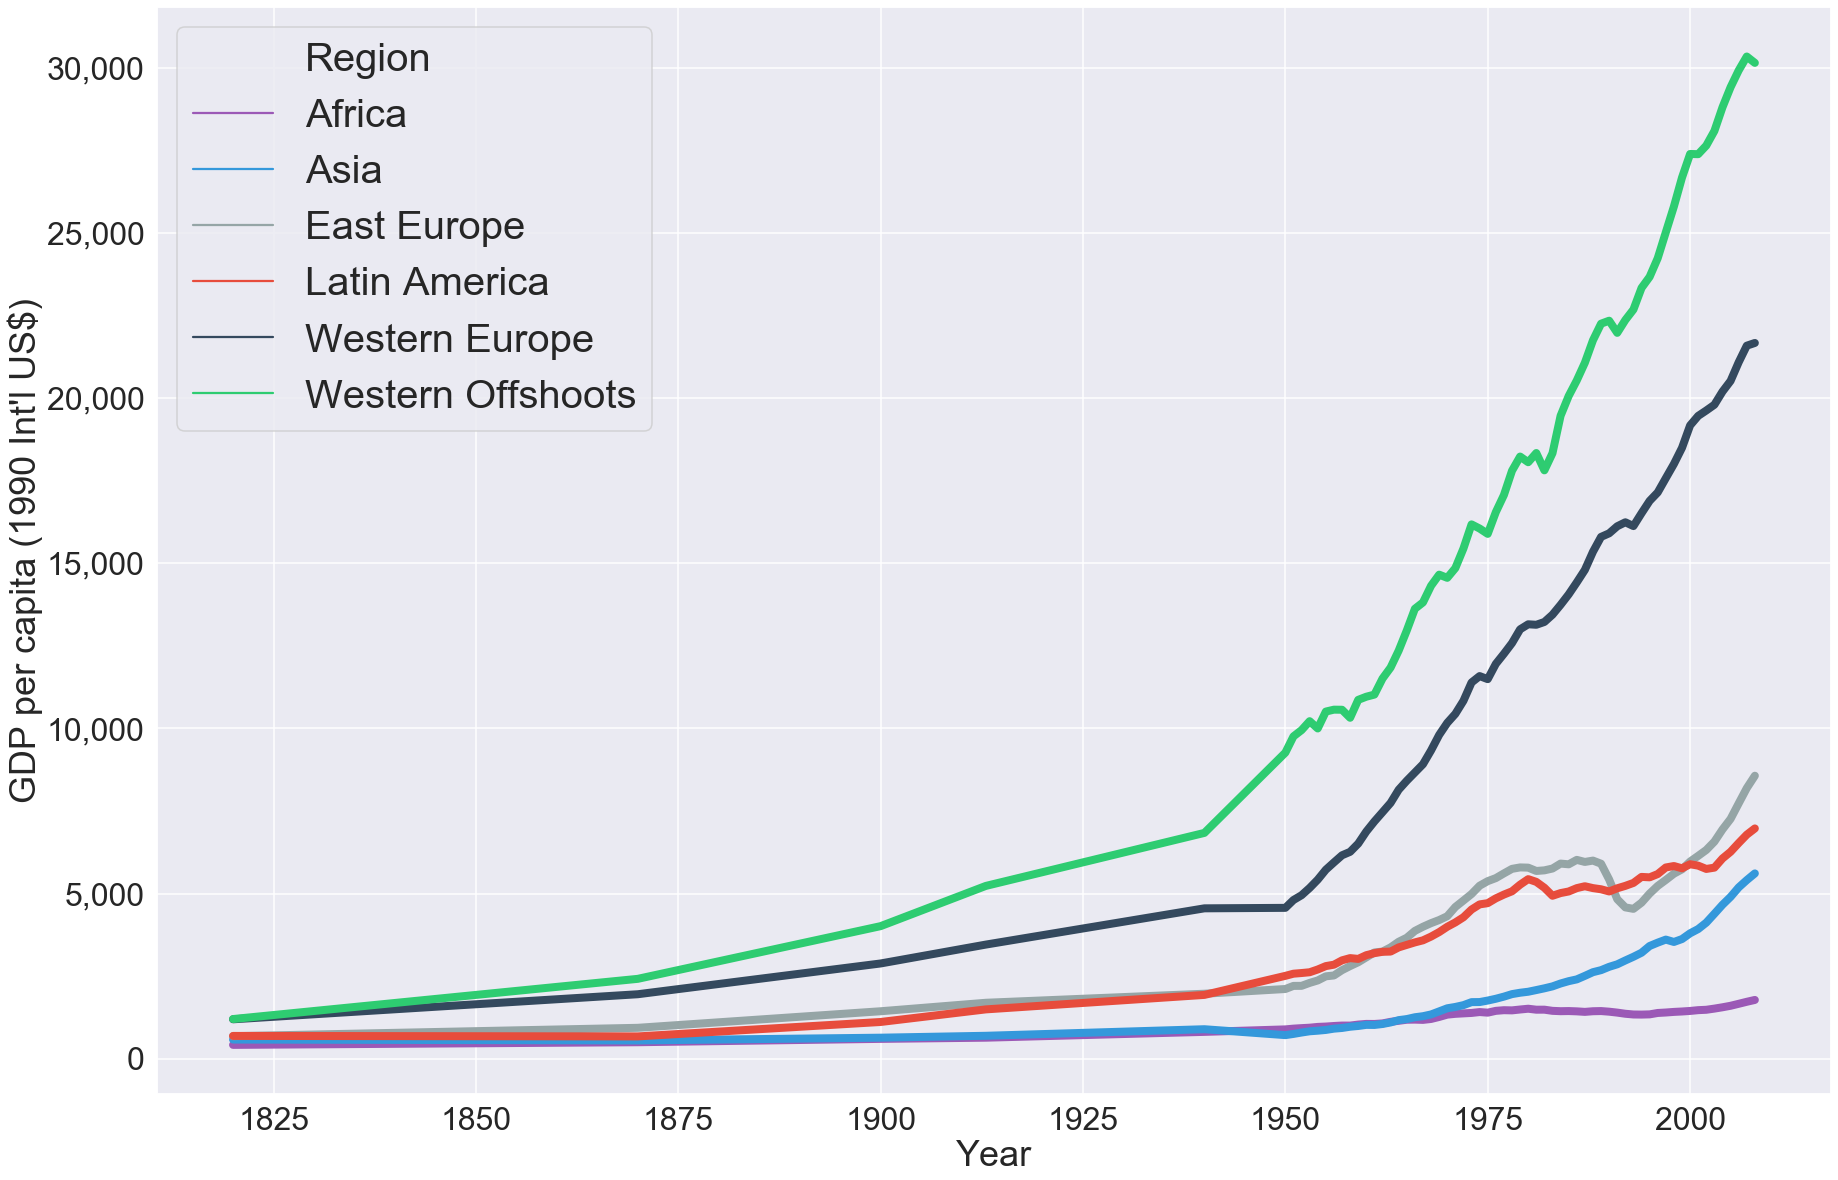

In [73]:
fig

Nice! Basically the same plot. But we can do better! Let's use ``seaborn`` again, but this time use different markers for each region, and let's use only a subset of the data so that it looks better. Also, let's export the figure so we can use it in our slides.

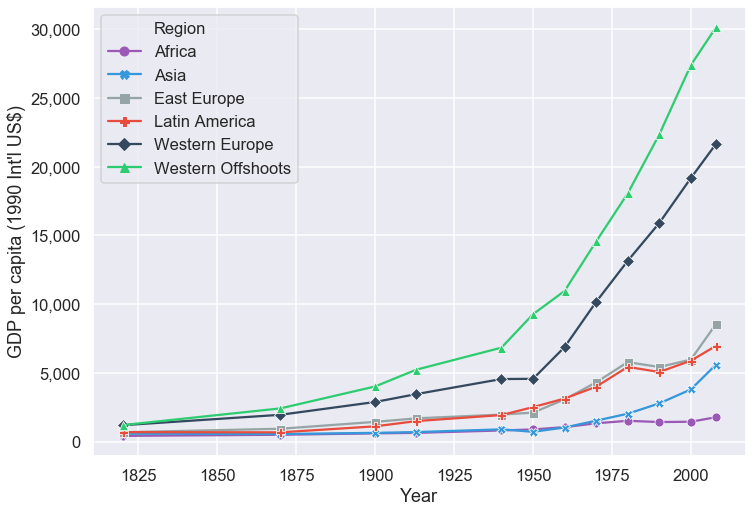

In [74]:
# Create category for hue
gdppc['Region'] = gdppc.Country.astype('category')
gdppc['gdppc_'] = gdppc.gdppc_.astype(float)

sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.reset_orig()
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='year', y='gdppc_', hue='Region', data=gdppc.loc[(gdppc.year>=1800) & (gdppc.year.apply(lambda x: x not in [
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2005,
       2006, 2007]))].reset_index(drop=True), alpha=1, palette=sns.color_palette(mycolors), style='Region', dashes=False, markers=True,)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.legend(title='', prop={'size': 40})
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita (1990 Int\'l US$)')
plt.savefig(pathgraphs + 'y1820-2010.pdf', dpi=300, bbox_inches='tight')

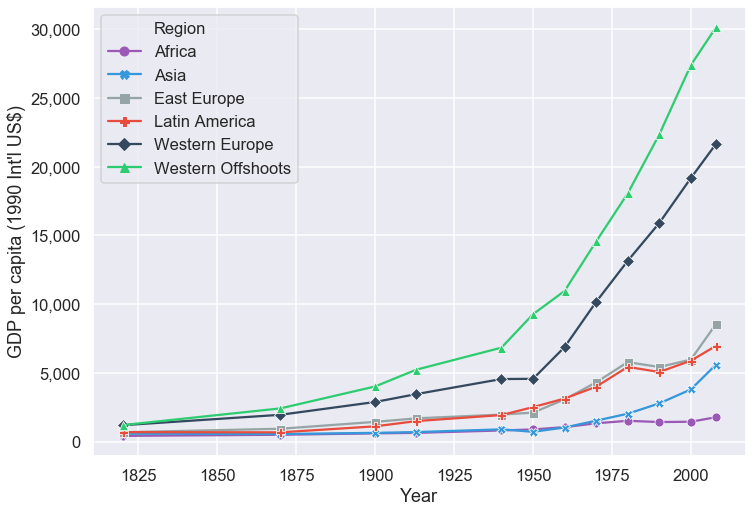

In [75]:
fig

Let's create the same plot using the updated data from the Maddison Project. Here we have less years, but the picture is similar.

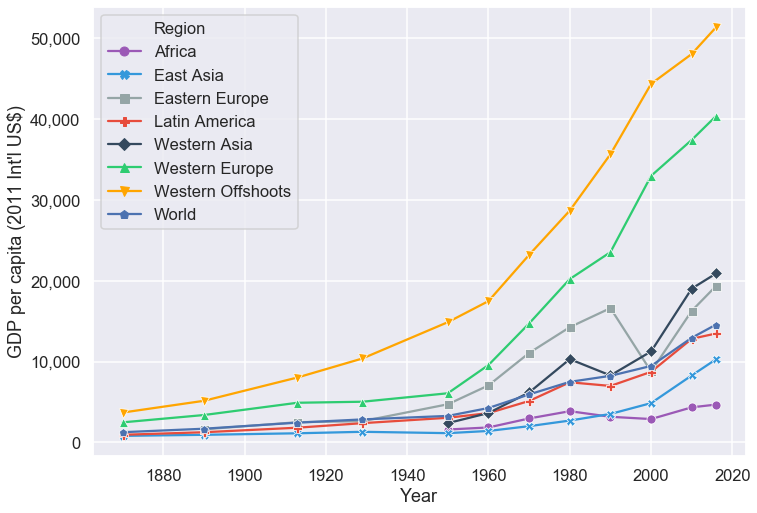

In [76]:
maddison_new_region['Region'] = maddison_new_region.region_name

mycolors2 = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "orange", "b"]
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.reset_orig()
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='year', y='cgdppc', hue='Region', data=maddison_new_region.loc[(maddison_new_region.year.apply(lambda x: x in [1870, 1890, 1913, 1929,1950, 2016])) | ((maddison_new_region.year>1950) & (maddison_new_region.year.apply(lambda x: np.mod(x,10)==0)))], alpha=1, palette=sns.color_palette(mycolors2), style='Region', dashes=False, markers=True,)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.legend(title='', prop={'size': 40})
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita (2011 Int\'l US$)')
plt.savefig(pathgraphs + 'y1870-2016.pdf', dpi=300, bbox_inches='tight')

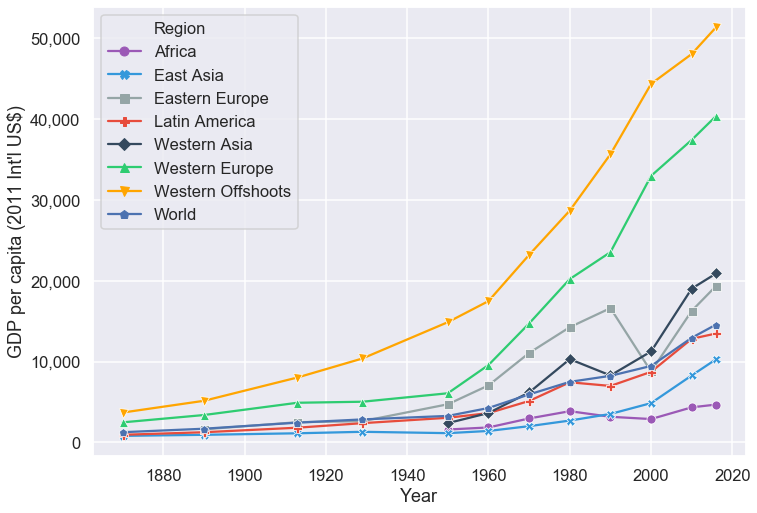

In [77]:
fig

Let's show the evolution starting from other periods.

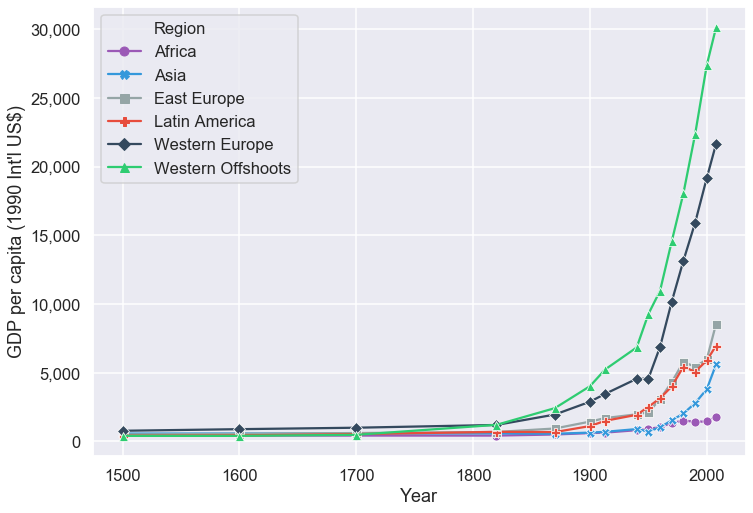

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.reset_orig()
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='year', y='gdppc_', hue='Region', data=gdppc.loc[(gdppc.year>=1500) & (gdppc.year.apply(lambda x: x not in [
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2005,
       2006, 2007]))].reset_index(drop=True), alpha=1, palette=sns.color_palette(mycolors), style='Region', dashes=False, markers=True,)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.legend(title='', prop={'size': 40})
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita (1990 Int\'l US$)')
plt.savefig(pathgraphs + 'y1500-2010.pdf', dpi=300, bbox_inches='tight')

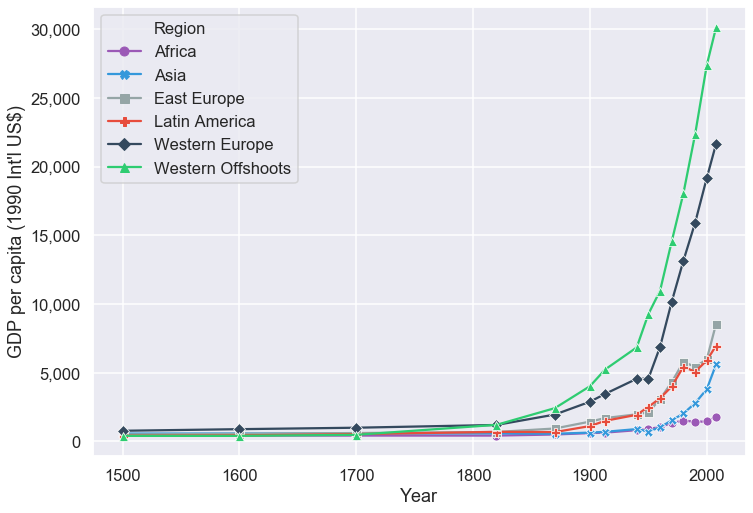

In [79]:
fig

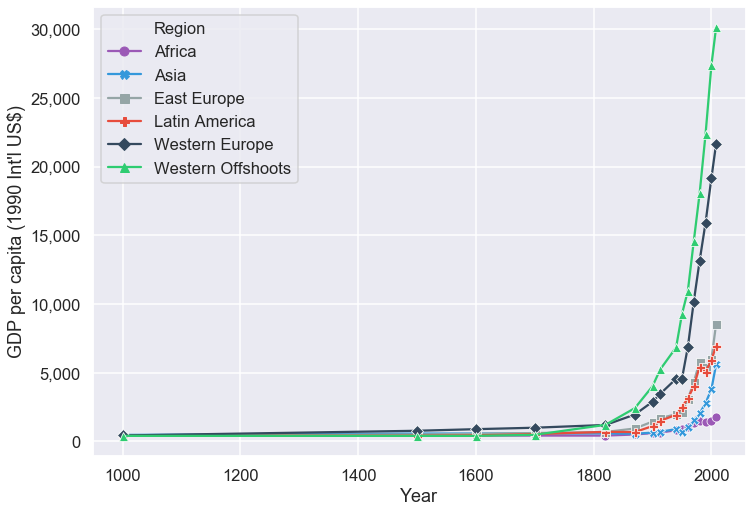

In [80]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.reset_orig()
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='year', y='gdppc_', hue='Region', data=gdppc.loc[(gdppc.year>=1000) & (gdppc.year.apply(lambda x: x not in [
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2005,
       2006, 2007]))].reset_index(drop=True), alpha=1, palette=sns.color_palette(mycolors), style='Region', dashes=False, markers=True,)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.legend(title='', prop={'size': 40})
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita (1990 Int\'l US$)')
plt.savefig(pathgraphs + 'y1000-2010.pdf', dpi=300, bbox_inches='tight')

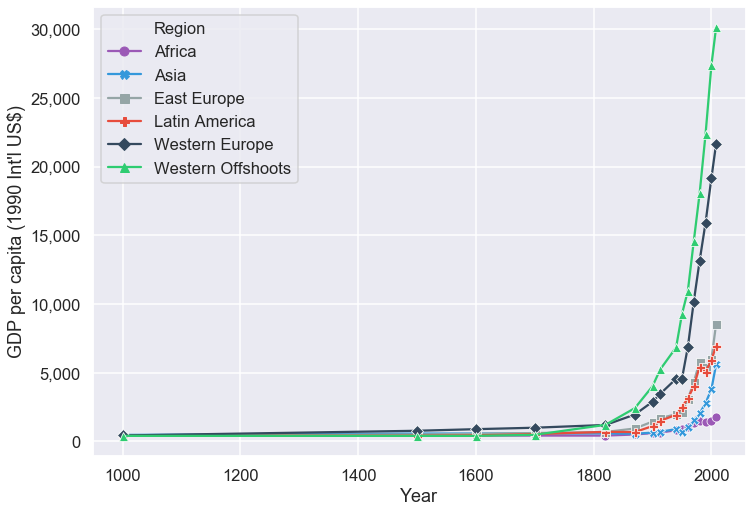

In [81]:
fig

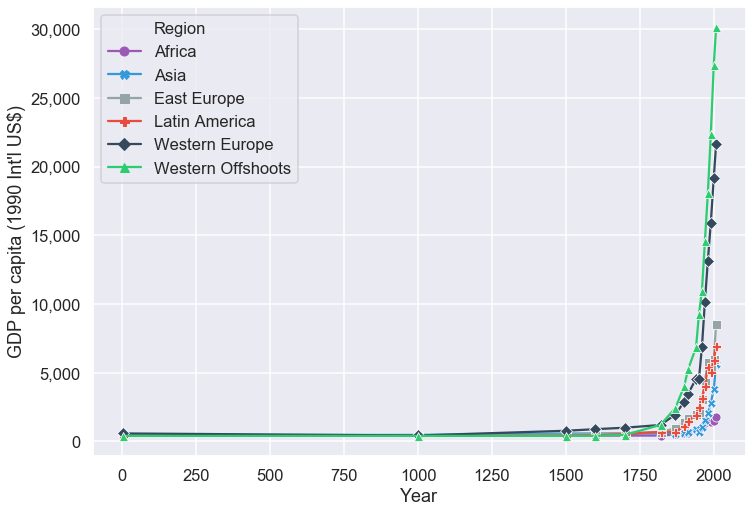

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.reset_orig()
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='year', y='gdppc_', hue='Region', data=gdppc.loc[(gdppc.year>=0) & (gdppc.year.apply(lambda x: x not in [
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2005,
       2006, 2007]))].reset_index(drop=True), alpha=1, palette=sns.color_palette(mycolors), style='Region', dashes=False, markers=True,)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.legend(title='', prop={'size': 40})
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita (1990 Int\'l US$)')
plt.savefig(pathgraphs + 'y1-2010.pdf', dpi=300, bbox_inches='tight')

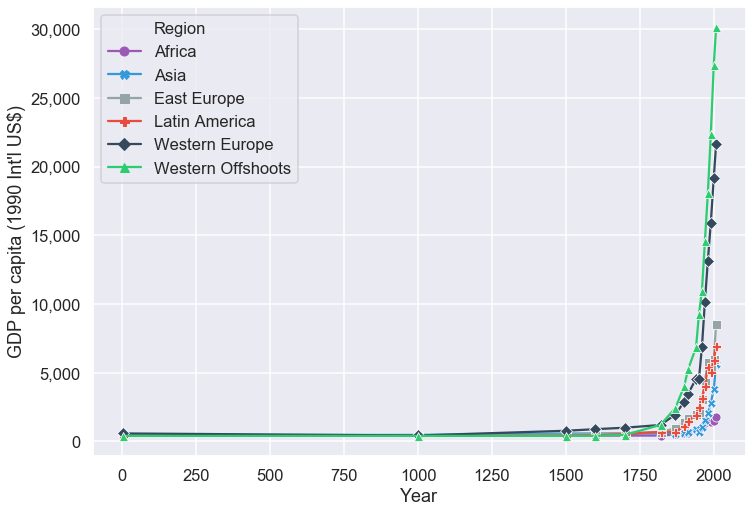

In [83]:
fig

#### Comparing richest to poorest region across time
Let's create a table that shows the GDP per capita levels for the 6 regions in the original data and compute the ratio of richest to poorest. Let's also plot it.

In [63]:
gdppc2['Richest-Poorest Ratio'] = gdppc2.max(axis=1) / gdppc2.min(axis=1)
gdp_ratio = gdppc2.loc[[1, 1000, 1500, 1700, 1820, 1870, 1913, 1940, 1960, 1980, 2000, 2008]].T
gdp_ratio = gdp_ratio.T.reset_index()

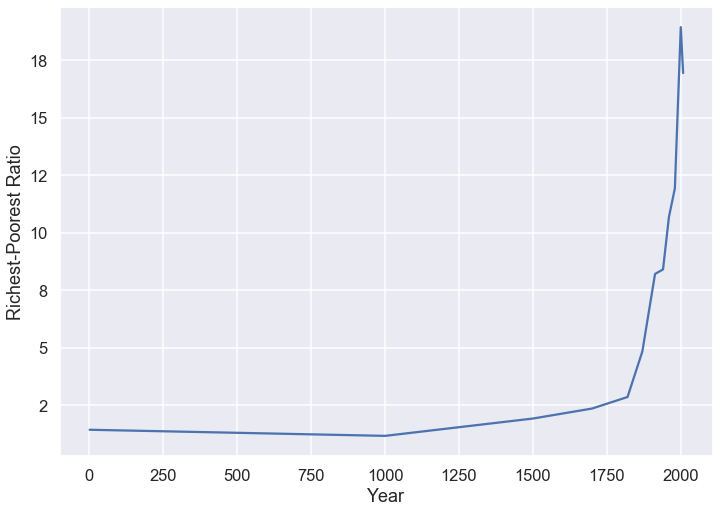

In [84]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.reset_orig()
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='year', y='Richest-Poorest Ratio', data=gdp_ratio, alpha=1)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.legend(title='', prop={'size': 40})
ax.set_xlabel('Year')
ax.set_ylabel('Richest-Poorest Ratio')
plt.savefig(pathgraphs + 'Richest-Poorest-Ratio.pdf', dpi=300, bbox_inches='tight')

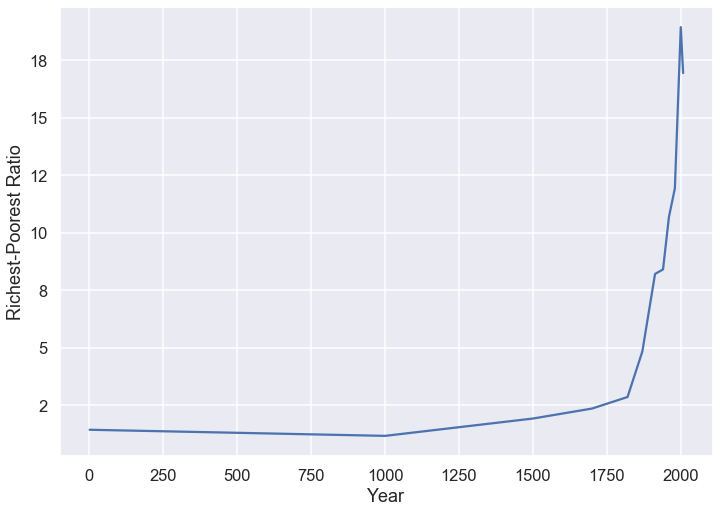

In [85]:
fig

### Visualize as Table

In [39]:
gdp_ratio.style.format({
    1: '{:,.1f}'.format, 1000: '{:,.1f}'.format, 1500: '{:,.1%}'.format, 1700: '{:,.1%}'.format, 
    1820: '{:,.1%}'.format, 1870: '{:,.1%}'.format, 1913: '{:,.1%}'.format, 1940: '{:,.1%}'.format, 
    1960: '{:,.1%}'.format, 1980: '{:,.1%}'.format, 2000: '{:,.1%}'.format, 2008: '{:,.1%}'.format, 
})

### Export table to LaTeX
Let's print the table as LaTeX code that can be copied and pasted in our slides or paper.

In [46]:
print(gdp_ratio.to_latex(formatters={
    1: '{:,.1f}'.format, 1000: '{:,.1f}'.format, 1500: '{:,.1f}'.format, 1700: '{:,.1f}'.format, 
    1820: '{:,.1f}'.format, 1870: '{:,.1f}'.format, 1913: '{:,.1f}'.format, 1940: '{:,.1f}'.format, 
    1960: '{:,.1f}'.format, 1980: '{:,.1f}'.format, 2000: '{:,.1f}'.format, 2008: '{:,.1f}'.format, 
}))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
year &  1    &  1000 &  1500 &  1700 &    1820 &    1870 &    1913 &    1940 &     1960 &     1980 &     2000 &     2008 \\
Country               &       &       &       &       &         &         &         &         &          &          &          &          \\
\midrule
Africa                & 472.4 & 424.8 & 413.7 & 420.6 &   419.8 &   500.0 &   637.4 &   813.4 &  1,055.1 &  1,514.6 &  1,447.1 &  1,780.3 \\
Asia                  & 455.7 & 470.0 & 568.4 & 571.6 &   580.6 &   553.5 &   695.1 &   894.0 &  1,025.7 &  2,028.7 &  3,797.6 &  5,611.2 \\
East Europe           & 411.8 & 400.0 & 496.0 & 606.0 &   683.2 &   936.6 & 1,694.9 & 1,968.7 &  3,069.8 &  5,785.9 &  5,970.2 &  8,569.0 \\
Latin America         & 400.0 & 400.0 & 416.5 & 526.6 &   691.1 &   676.0 & 1,494.4 & 1,932.9 &  3,135.5 &  5,437.9 &  5,889.2 &  6,973.1 \\
Western Europe        & 576.2 & 427.4 & 771.1 & 993.5 & 1,194.2 & 1,953.1 & 3,456.6 & 4,554.0 &  6,879.3 & 13,154.0 & 19,1

In [47]:
%%latex
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
year &  1    &  1000 &  1500 &  1700 &    1820 &    1870 &    1913 &    1940 &     1960 &     1980 &     2000 &     2008 \\
Country               &       &       &       &       &         &         &         &         &          &          &          &          \\
\midrule
Africa                & 472.4 & 424.8 & 413.7 & 420.6 &   419.8 &   500.0 &   637.4 &   813.4 &  1,055.1 &  1,514.6 &  1,447.1 &  1,780.3 \\
Asia                  & 455.7 & 470.0 & 568.4 & 571.6 &   580.6 &   553.5 &   695.1 &   894.0 &  1,025.7 &  2,028.7 &  3,797.6 &  5,611.2 \\
East Europe           & 411.8 & 400.0 & 496.0 & 606.0 &   683.2 &   936.6 & 1,694.9 & 1,968.7 &  3,069.8 &  5,785.9 &  5,970.2 &  8,569.0 \\
Latin America         & 400.0 & 400.0 & 416.5 & 526.6 &   691.1 &   676.0 & 1,494.4 & 1,932.9 &  3,135.5 &  5,437.9 &  5,889.2 &  6,973.1 \\
Western Europe        & 576.2 & 427.4 & 771.1 & 993.5 & 1,194.2 & 1,953.1 & 3,456.6 & 4,554.0 &  6,879.3 & 13,154.0 & 19,176.0 & 21,671.8 \\
Western Offshoots     & 400.0 & 400.0 & 400.0 & 476.0 & 1,202.0 & 2,419.2 & 5,232.8 & 6,837.8 & 10,961.1 & 18,060.2 & 27,393.8 & 30,151.8 \\
Richest-Poorest Ratio &   1.4 &   1.2 &   1.9 &   2.4 &     2.9 &     4.8 &     8.2 &     8.4 &     10.7 &     11.9 &     18.9 &     16.9 \\
\bottomrule
\end{tabular}


<IPython.core.display.Latex object>

### Export Table to HTML

In [54]:
from IPython.display import display, HTML
display(HTML(gdp_ratio.to_html(formatters={
    1: '{:,.1f}'.format, 1000: '{:,.1f}'.format, 1500: '{:,.1f}'.format, 1700: '{:,.1f}'.format, 
    1820: '{:,.1f}'.format, 1870: '{:,.1f}'.format, 1913: '{:,.1f}'.format, 1940: '{:,.1f}'.format, 
    1960: '{:,.1f}'.format, 1980: '{:,.1f}'.format, 2000: '{:,.1f}'.format, 2008: '{:,.1f}'.format, 
})))

# Persistence

Let's explore the persistence of economic development since 1950. To do so, let's get the Penn World Table and World Bank Data.

## Penn World Table

Let's start by importing the data from the Penn World Tables

In [ ]:
try:
    pwt_xls.read_excel(pathout + 'pwt91.xlsx',encoding='utf-8')
    pwt.read_stata(pathout + 'pwt91.dta')    
except:
    pwt_xls = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt91.xlsx',sheet_name=1)
    pwt = pd.read_stata('https://www.rug.nl/ggdc/docs/pwt91.dta')
    pwt_xls.to_excel(pathout + 'pwt91.xlsx', index=False, encoding='utf-8')
    pwt.to_stata(pathout + 'pwt91.dta', write_index=False, version=117)

The main object in [Pandas](http://pandas.pydata.org) is a dataframe. 
Here we have created two dataframes based on an Excel file and a Stata file.

``df`` is a dataframe that contains the variable names and their definition, while ``dfpwt`` contains the data. Let's explore them.

In [ ]:
df

In [ ]:
dfpwt

Now, we can create new variables, transform and plot the data

## Computing $\log$ Income per Capita

To compute the $log$ of income per capita (GDPpc), the first thing we need is to know the name of the column that contains the GDPpc data in the dataframe. To do this, let's find among the variables those whic in their description have the word *capita*.

In [ ]:
df.columns

In [ ]:
df.loc[df['Variable definition'].apply(lambda x: str(x).lower().find('capita')!=-1)]

So, it seems the data does not contain that variable. But do not panic...we know how to compute it based on *GDP* and *Population*. Let's do it!

### Identify the name of the variable for GDP

In [ ]:
df.loc[df['Variable definition'].apply(lambda x: str(x).upper().find('GDP')!=-1)]

### Identify the name of the variable for population

In [ ]:
df.loc[df['Variable definition'].apply(lambda x: str(x).lower().find('population')!=-1)]

### Create a new variable/column with Expenditure-side real GDPpc at chained PPPs

In [ ]:
dfpwt['rgdppce'] = dfpwt['rgdpe'] / dfpwt['pop']

### Create a plot of this measure of GDP vs Population for all countries in the last year of the dataset

In [ ]:
# Let's figure out the last period
lastperiod = dfpwt.iloc[-1].year
print(lastperiod)

In [ ]:
# Select data for last period
dflast = dfpwt.loc[dfpwt.year==lastperiod]

In [ ]:
dflast

In [ ]:
ax = dflast.plot.scatter(x='pop', y='rgdpe', c='rgdppce', cmap='Reds', )

### Use statistical and mathematical functions to analyze the data

In [ ]:
# Describe the data
dfpwt.describe()

In [ ]:
dflast.describe()

In [ ]:
dflast[['rgdpe', 'rgdppce', 'pop']].corr()

### Excercise: 
1. Create GDPpc measures based on all other measures of GDP
2. Compare these measures using plot, correlations, etc. 


In [ ]:
dfincome=pd.read_csv('./WDI/wdigdppc.csv', skiprows=2)
dfmobile=pd.read_excel('./WDI/wdimobile.xls', skiprows=2)

Now you should have a *data frame* with the data you downloaded.

Let's see what they look like...

In [ ]:
dfincome

In [ ]:
dfmobile

Notice that these **data frames** look like spreadsheets or data tables. Columns have names that can be used to call the data, e.g.

In [ ]:
dfmobile.columns

In [ ]:
dfmobile['Country Code']

We can use columns to compute additional information. For example the growth rate of income per capite between 2000 and 2005 is

In [ ]:
growth=np.log(dfincome['2005'])-np.log(dfincome['2000'])

In [ ]:
growth

Notice we do not know which country the growth rate belongs to. We could create a column in dfincome that holds the growth value or we can change the index of the data frame so that it keeps the country code (this is useful!)

In [ ]:
dfincome['growth']=np.log(dfincome['2005'])-np.log(dfincome['2000'])

In [ ]:
dfincome[['Country Code','growth']]

In [ ]:
dfincome.set_index('Country Code', inplace=True)

In [ ]:
growth=np.log(dfincome['2005'])-np.log(dfincome['2000'])
growth.name='growth'
growth

Let's delete the growth column from dfincome

In [ ]:
dfincome.drop('growth',axis=1, inplace=True)

Let's compute the growth of cell phone subscription for the period 2000-2005

In [ ]:
dfmobile.set_index('Country Code',inplace=True)
growthmobile=np.log(dfmobile['2005'])-np.log(dfmobile['2000'])

In [ ]:
growthmobile.name='mobile'

In [ ]:
growthmobile

Let's see the descriptive stats for each growth process

In [ ]:
growth.describe()

In [ ]:
growthmobile.describe()

Notice that growthmobile has infinite mean, i.e. some country started with zero coverage and now has positive one. Let's see for which ccountries that is the case and change those observations to NaN.

In [ ]:
growthmobile.ix[growthmobile==np.inf]

In [ ]:
growthmobile.ix[growthmobile==np.inf]=np.nan

In [ ]:
growthmobile.describe()

Let's compute the correlation between between both growth rates

In [ ]:
growth.corr(growthmobile)

Let's run an OLS regression between both growth rates, but first let's merge the data together. 
First we merge the data using the pd.merge command, which allows us to merge two data frames. 

In [ ]:
mydata=pd.merge(growth.reset_index(),growthmobile.reset_index())
mydata

Second, we use the pd.concat command that concatenates series or data frames into data frames.

In [ ]:
grates=pd.concat([growth,growthmobile],axis=1)
grates

Now let's import the *statsmodels* module to run the regression.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Latex

In [ ]:
mod = sm.OLS(mydata['growth'],sm.add_constant(mydata['mobile']), missing='drop').fit()
mod.summary2()

In [ ]:
mod = smf.ols(formula='growth ~ mobile', data=mydata[['growth','mobile']], missing='drop').fit()
mod.summary2()

In [ ]:
mod = smf.ols(formula='growth ~ mobile', data=grates, missing='drop').fit()
mod.summary2()

In [ ]:
mysummary=mod.summary2()
Latex(mysummary.as_latex())

# Homework

Using Pandas and Statsmodels write a Python script that: 

1. Downloads and opens the data from the Penn World Tables (PWT) versions 7.1 and 8.0
2. Using the data from the PWT estimate the contribution of technological progress, TFP, by using the growth accounting framework studied in class.
3. Using the data from the PWT calibrate productivity difference using the framework studied in class.
4. Using the data from the PWT replicate the MRW analysis.

Some additional useful tools:

* LaTeX Output
* Plotting

In [ ]:
%%latex
\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}

Some examples of plots...

In [ ]:
dfincome[[str(i) for i in range(1990,2013)]].loc['USA'].plot()

In [ ]:
plt.scatter(grates.growth,grates.mobile)

In [ ]:
from pandas_datareader import data, wb
dfwbcountries = wb.get_countries()
dfwbcountries['name'] = dfwbcountries.name.str.strip()
popvars = wb.search(string='population')
popfields = ['SP.POP.0014.FE.IN', 'SP.POP.1564.MA.IN', 'SP.POP.65UP.FE.IN',
             'SP.POP.0014.MA.IN', 'SP.POP.1564.MA.IN', 'SP.POP.65UP.MA.IN',
             'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL',
             'EN.URB.MCTY', 'EN.URB.LCTY']
wdi = wb.download(indicator=popfields, country=dfwbcountries.iso2c.values, start=2017, end=2017)
wdi.reset_index(inplace=True)
wdi = dfwbcountries.merge(wdi, left_on='name', right_on='country')
wdi['ISO_CODE'] = wdi.iso2c.str.strip()
wdi.set_index('ISO_CODE', inplace=True)
wdi.to_csv('./WDI/wdipop.csv', encoding='utf-8')


# Examples